### **1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

### **2. Loading Dataset**

In [2]:
movies = pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')

In [3]:
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movies.shape

(15509, 10)

In [5]:
movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
movies.dropna(inplace=True)

In [7]:
movies = movies.drop(["Year","Duration","Votes"], axis=1)

### **3. Initial Statistics**

In [8]:
movies.shape

(5659, 7)

In [9]:
movies["Genre"].value_counts()

Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: Genre, Length: 376, dtype: int64

In [10]:
movies["Director"].value_counts()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: Director, Length: 2431, dtype: int64

In [11]:
movies["Actor 1"].value_counts()

Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
                     ... 
Murad Ali               1
Amarjeet                1
Rinku Jaiswal           1
Usha Kiran              1
Darsheel Safary         1
Name: Actor 1, Length: 1960, dtype: int64

In [12]:
movies["Actor 2"].value_counts()

Rekha                 52
Hema Malini           48
Mithun Chakraborty    38
Dharmendra            38
Akshay Kumar          34
                      ..
Sanjana Tiwari         1
Divya Chouksey         1
Suchendra Prasad       1
Sid Makkar             1
Jayamalini             1
Name: Actor 2, Length: 2321, dtype: int64

In [13]:
movies["Actor 3"].value_counts()

Pran                  57
Anupam Kher           51
Prem Chopra           32
Paresh Rawal          30
Mithun Chakraborty    29
                      ..
Benyamin Bahadori      1
Makarand Anaspure      1
Shloka Pandit          1
Anandee Tripathi       1
Shatakshi Gupta        1
Name: Actor 3, Length: 2556, dtype: int64

### **4. Exploratory Data Analysis**

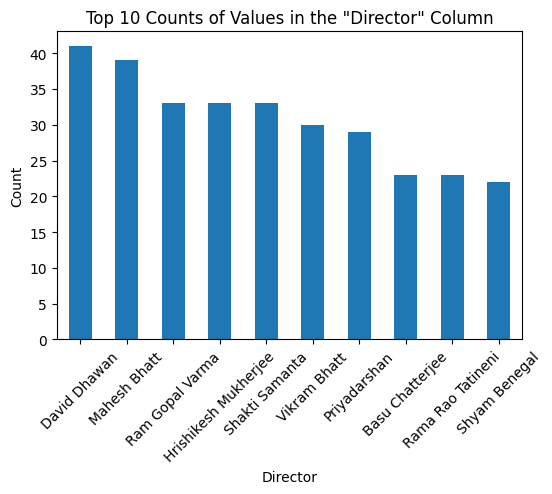

In [14]:
top_10_director = movies['Director'].value_counts().head(10)

plt.figure(figsize=(6, 4))
top_10_director.plot(kind='bar')
plt.title('Top 10 Counts of Values in the "Director" Column')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

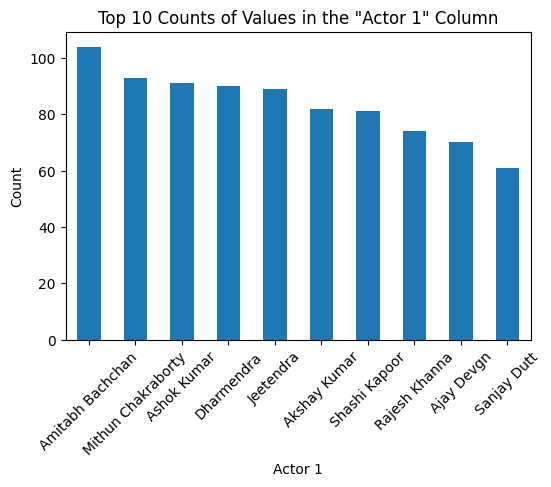

In [15]:
top_10_actor1 = movies['Actor 1'].value_counts().head(10)

plt.figure(figsize=(6, 4))
top_10_actor1.plot(kind='bar')
plt.title('Top 10 Counts of Values in the "Actor 1" Column')
plt.xlabel('Actor 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

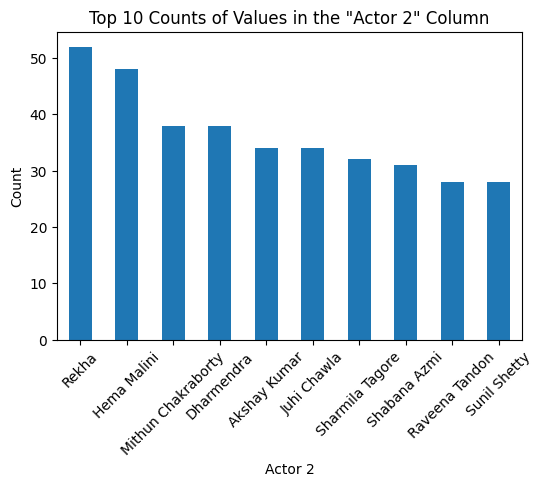

In [16]:
top_10_actor2 = movies['Actor 2'].value_counts().head(10)

plt.figure(figsize=(6, 4))
top_10_actor2.plot(kind='bar')
plt.title('Top 10 Counts of Values in the "Actor 2" Column')
plt.xlabel('Actor 2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

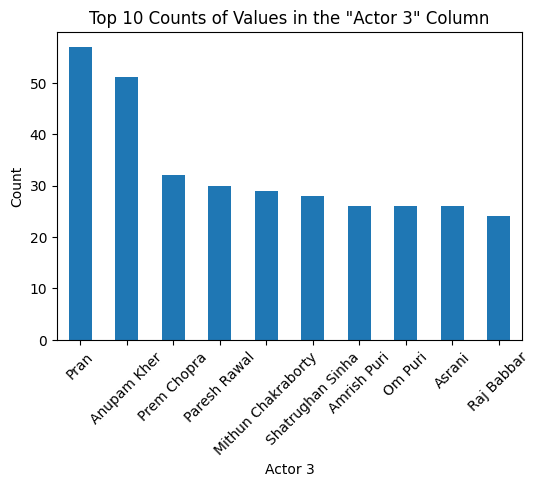

In [17]:
top_10_actor3 = movies['Actor 3'].value_counts().head(10)

plt.figure(figsize=(6, 4))
top_10_actor3.plot(kind='bar')
plt.title('Top 10 Counts of Values in the "Actor 3" Column')
plt.xlabel('Actor 3')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

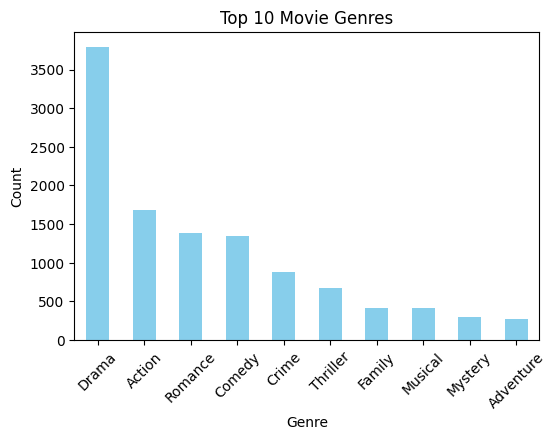

In [18]:
genre_split = movies['Genre'].str.split(', ', expand=True).stack()

top_10_genres = genre_split.value_counts().head(10)


plt.figure(figsize=(6, 4))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **5. Feature Engineering**

In [19]:
def remove_punc(text):
  punct = string.punctuation
  a = text.translate(str.maketrans('','',punct))
  return a.lower()

movies["Genre"] = movies["Genre"].apply(remove_punc)

In [20]:
def rmv_punc_and_spaces(text):
    chars_to_remove = string.punctuation + " "
    cleaned_text = text.translate(str.maketrans('', '', chars_to_remove)).lower()
    return cleaned_text

movies["Name"] = movies["Name"].apply(rmv_punc_and_spaces)
movies["Director"] = movies["Director"].apply(rmv_punc_and_spaces)
movies["Actor 1"] = movies["Actor 1"].apply(rmv_punc_and_spaces)
movies["Actor 2"] = movies["Actor 2"].apply(rmv_punc_and_spaces)
movies["Actor 3"] = movies["Actor 3"].apply(rmv_punc_and_spaces)

In [21]:
le = LabelEncoder()

movies["Director"] = le.fit_transform(movies["Director"])
movies["Actor 1"] = le.fit_transform(movies["Actor 1"])
movies["Actor 2"] = le.fit_transform(movies["Actor 2"])
movies["Actor 3"] = le.fit_transform(movies["Actor 3"])
movies["Genre"] = le.fit_transform(movies["Genre"])

### **6. Splitting Data**

In [22]:
X = movies.drop(["Name","Rating"],axis=1)
Y = movies["Rating"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
X.head()

,Genre,Director,Actor 1,Actor 2,Actor 3
1,229,619,1350,2271,318
3,184,1335,1198,718,2142
5,157,1514,377,74,2040
6,289,2011,689,1107,2519
8,320,123,1934,1173,1008


### **7. Model Training and Evaluation**

In [24]:
regressor = RandomForestRegressor()

regressor.fit(x_train,y_train)

regressor_train = regressor.predict(x_train)
regressor_train_acc = metrics.mean_squared_error(regressor_train, y_train)
print("Random Forest Regressor Training Data Mean Squared Error:- ",regressor_train_acc)

print("\n\n*************\n\n")

regressor_test = regressor.predict(x_test)
regressor_test_acc = metrics.mean_squared_error(regressor_test, y_test)
print("Random Forest Regressor Testing Data Mean Squared Error:- ",regressor_test_acc)

Random Forest Regressor Training Data Mean Squared Error:-  0.2445595944422354


*************


Random Forest Regressor Testing Data Mean Squared Error:-  1.7734364225453965


In [25]:
lr = LinearRegression()

lr.fit(x_train,y_train)

lr_train = lr.predict(x_train)
lr_train_acc = metrics.mean_squared_error(lr_train, y_train)
print("Linear Regression Training Data Mean Squared Error:- ",lr_train_acc)

print("\n\n*************\n\n")

lr_test = lr.predict(x_test)
lr_test_acc = metrics.mean_squared_error(lr_test, y_test)
print("Linear Regression Testing Data Mean Squared Error:- ",lr_test_acc)

Linear Regression Training Data Mean Squared Error:-  1.861246549448808


*************


Linear Regression Testing Data Mean Squared Error:-  1.9184272896834564


In [26]:
ridge = Ridge(alpha=1.0)

ridge.fit(x_train,y_train)

ridge_train = ridge.predict(x_train)
ridge_train_acc = metrics.mean_squared_error(ridge_train, y_train)
print("Ridge Regression Training Data Mean Squared Error:- ",ridge_train_acc)

print("\n\n*************\n\n")

ridge_test = ridge.predict(x_test)
ridge_test_acc = metrics.mean_squared_error(ridge_test, y_test)
print("Ridge Regression Testing Data Mean Squared Error:- ",ridge_test_acc)

Ridge Regression Training Data Mean Squared Error:-  1.8612465494488075


*************


Ridge Regression Testing Data Mean Squared Error:-  1.918427289413471


In [27]:
lasso = Lasso(alpha=1.0)

lasso.fit(x_train,y_train)

lasso_train = lasso.predict(x_train)
lasso_train_acc = metrics.mean_squared_error(lasso_train, y_train)
print("Lasso Regression Training Data Mean Squared Error:- ",lasso_train_acc)

print("\n\n*************\n\n")

lasso_test = lasso.predict(x_test)
lasso_test_acc = metrics.mean_squared_error(lasso_test, y_test)
print("Lasso Regression Testing Data Mean Squared Error:- ",lasso_test_acc)

Lasso Regression Training Data Mean Squared Error:-  1.8613391495951797


*************


Lasso Regression Testing Data Mean Squared Error:-  1.917308118254214


**Random Forest Regressor performs the best**